In [1]:
import pandas as pd

In [2]:
suppliers = pd.read_csv("https://www.dropbox.com/s/jjbacrux6bc1b4s/suppliers.csv?dl=1")
demand = pd.read_csv("https://www.dropbox.com/s/0yikq3pugq87vl9/demand_forecasts.csv?dl=1")
recipes = pd.read_csv("https://www.dropbox.com/s/az97voeh6i8x3i2/recipes.csv?dl=1")

In [3]:
suppliers

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
1,megacorp,milk_powder,3200.0,tonne,france,12,3
2,megacorp,hazelnut,1918.0,tonne,turkey,12,4
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10
5,omni_inc,cocoa,2400.0,tonne,cote d'ivoire,14,12
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
8,omni_inc,sugar,465.0,tonne,india,5,12
9,omni_inc,vanilla,201.0,tonne,indonesia,3,12


In [4]:
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]

demand['month'] = pd.Categorical(demand['month'], categories=months, ordered=True)
demand


,rec_id,month,demand
0,1,jan,16443
1,1,feb,18943
2,1,mar,19727
3,1,apr,10368
4,1,may,15125
5,1,jun,18413
6,1,jul,17442
7,1,aug,19986
8,1,sep,15302
9,1,oct,13637


In [5]:
recipes

,rec_id,ingredient_uuid,cost_to_process,time_to_process,qty
0,1,cocoa,0.20,120,13
1,1,milk_powder,0.03,110,12
2,1,hazelnut,0.08,45,4
3,1,sugar,0.40,80,5
4,2,vanilla,0.10,34,3
5,2,cocoa,0.20,120,12
6,2,milk_powder,0.03,110,11
7,2,sugar,0.40,80,4
8,3,hazelnut,0.08,45,3
9,3,vanilla,0.10,34,2


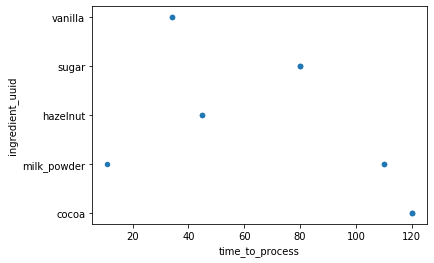

In [6]:
recipes.plot.scatter(y='ingredient_uuid', x='time_to_process')

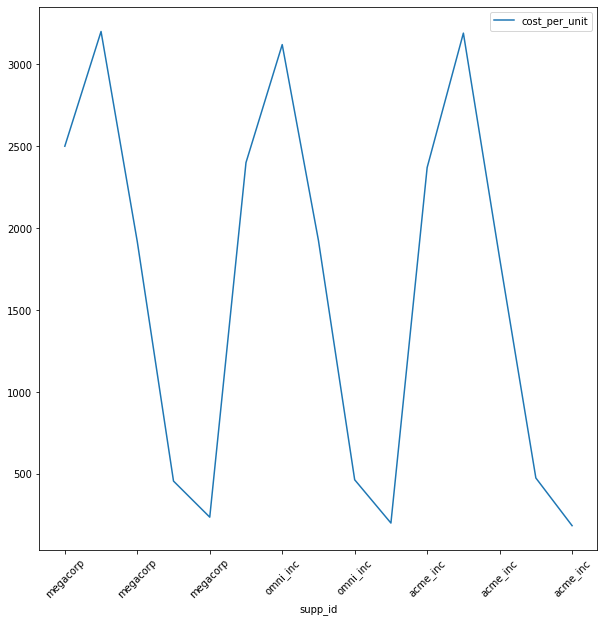

In [7]:
suppliers.plot(x="supp_id", y="cost_per_unit", rot=45, figsize=(10,10))

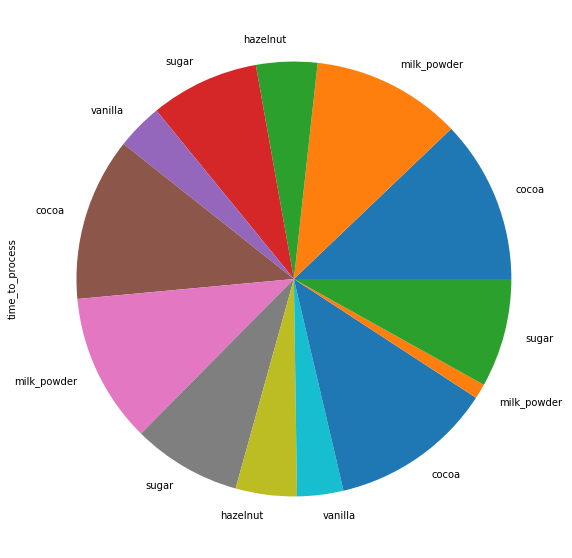

In [8]:
#nb pie needs only a "series", i.e. one col

recipes['time_to_process'].plot.pie( labels = recipes['ingredient_uuid'], figsize=(10,10) )

In [9]:
suppliers.set_index(['supp_id', "ingredient_uuid"])

cost_per_unit unit_name country_of_origin  \
supp_id  ingredient_uuid                                              
megacorp cocoa                   2500.0     tonne             ghana   
         milk_powder             3200.0     tonne            france   
         hazelnut                1918.0     tonne            turkey   
         sugar                    457.0     tonne            brazil   
         vanilla                  237.0     tonne             china   
omni_inc cocoa                   2400.0     tonne     cote d'ivoire   
         milk_powder             3120.0     tonne       switzerland   
         hazelnut                1925.0     tonne             italy   
         sugar                    465.0     tonne             india   
         vanilla                  201.0     tonne         indonesia   
acme_inc cocoa                   2370.0     tonne         indonesia   
         milk_powder             3190.0     tonne           denmark   
         hazelnut                1817.0     tonne               usa   
         sugar                    476.0     tonne             china   
         vanilla                  185.0     tonne        madagascar   

                          total_tax_per_unit  time_to_deliver  
supp_id  ingredient_uuid                                       
megacorp cocoa                            14               12  
         milk_powder                      12                3  
         hazelnut                         12                4  
         sugar                             5                9  
         vanilla                           3               10  
omni_inc cocoa                            14               12  
         milk_powder                       0                2  
         hazelnut                         12                3  
         sugar                             5               12  
         vanilla                           3               12  
acme_inc cocoa                            14               12  
         milk_powder                      12                3  
         hazelnut                         12                8  
         sugar                             5               10  
         vanilla                           3               12

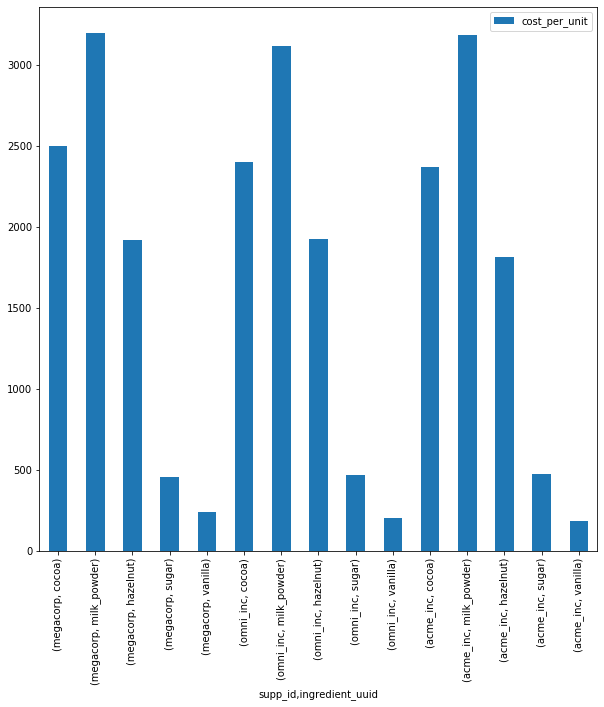

In [10]:
#if you don't specify x, you'll get the index values
suppliers.set_index(['supp_id', "ingredient_uuid"]).plot.bar(y="cost_per_unit", rot=90, figsize=(10,10))

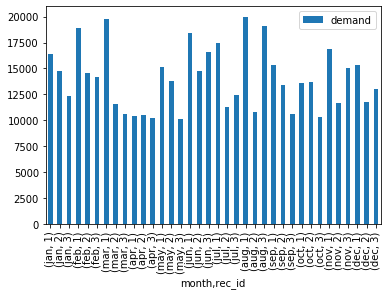

In [11]:
demand.groupby(["month", "rec_id"]).sum().plot.bar()

In [12]:
demand.groupby(["month", "rec_id"]).sum()

demand
month rec_id        
jan   1        16443
      2        14779
      3        12356
feb   1        18943
      2        14568
      3        14191
mar   1        19727
      2        11552
      3        10613
apr   1        10368
      2        10552
      3        10261
may   1        15125
      2        13765
      3        10111
jun   1        18413
      2        14758
      3        16552
jul   1        17442
      2        11285
      3        12428
aug   1        19986
      2        10799
      3        19101
sep   1        15302
      2        13370
      3        10577
oct   1        13637
      2        13686
      3        10309
nov   1        16877
      2        11628
      3        15003
dec   1        15290
      2        11724
      3        13065

In [13]:
demand.groupby(["month", "rec_id"]).sum().pivot_table(index="month", columns='rec_id', values='demand')

rec_id,1,2,3
month,,,
jan,16443,14779,12356
feb,18943,14568,14191
mar,19727,11552,10613
apr,10368,10552,10261
may,15125,13765,10111
jun,18413,14758,16552
jul,17442,11285,12428
aug,19986,10799,19101
sep,15302,13370,10577


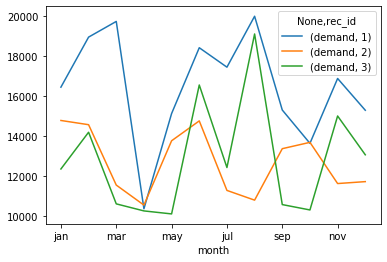

In [14]:
#nb, this will give you one line per col
demand.groupby(["month", "rec_id"]).sum().pivot_table(index="month", columns='rec_id').plot()

In [15]:
data = pd.Series(np.random.randn(1000))
data

NameError: name 'np' is not defined

In [ ]:
data.hist(figsize=(6, 4), bins=5)

In [ ]:
data.hist(figsize=(6, 4), bins=100)

In [ ]:
#Review project 
#no need to save query results anywhere unless stated to

select the supplier_id col from suppliers table

Select the supplier_id and ingredient_uuid col from suppliers table.

Remember its the weird looking double square brackets to select a list of cols.
The first brackets select, the second (inside ones) are for the list.

what happens if you select them in the opposite order?

df[['cola', 'colb']] vs df[['colb', 'cola']]

select row with index 3 from suppliers table

sort the supplies table on the country_of_origin col in decending order, and save result in original variable

select row with index 3 from suppliers table

select row in position 3 from suppliers table

In [ ]:
#given this dict

d = {'supp_id': 'belize',
 'ingredient_uuid': 'cocoa',
 'cost_per_unit': 2200,
 'unit_name': 'tonne',
 'country_of_origin': 'ghana',
 'total_tax_per_unit': 14,
 'time_to_deliver': 12}

#use append to add a new row to the supplies table, and remember to save the result
#remember to use ignore_index=True when you append like this, or it won't know where to add your row and will complain.
#using ignore_index=True means it will add it to the "bottom" of your df, with a new index value pandas will create.

select all the demand in the month of may

select all the rows of demand with demand greater that 17442

Is demand ever greater that 17442 in may, june or july?

using idxmin, find the cheapest supplier of cocoa

use groupby and idxmin to find the index of the cheapest supplier of each ingredient

then select these rows from the original table using loc and save it into a new table called cheapest_suppliers


create a histogram of price distribution for all ingredients (one plot for all ingredients together)

what is the variance of demand in each month for each recipe?
take demand and groupby month and rec_id then find the variance ( use df.groupby( "something" ).var() )

now make a bar plot to show the variance in each month

create a 3 pie plots each showing demand for a rec_id each month. One segment of the plot should be for each month.

hint: groupby rec_id first, see what happens if you run plot directly on your groupby?

merge recipe table into demand on "rec_id" to find demand for each recipe. Create a line plot for each recipe.

merge recipe table into suppliers on "ingredient_uuid", then find the highest tax ingredient in each recipe.

create a bar plot of ingredient_uuid vs highest tax rate

merge recipe table into suppliers on "ingredient_uuid", then find the highest delivery time ingredient in each recipe.

create a bar plot of ingredient_uuid vs highest delivery time

In [ ]:
#load this file
flavors = pd.read_csv("https://www.dropbox.com/s/lix81ov5ut6fobb/flavours_of_cocoa.csv?dl=1")
flavors

drop any nan from the above table using dropna.
how many rows were dropped?

groupby company, and plot in a bar plot the average rating

convert the cocoa percent col into a float, currently it is a string (called "object" in pandas). you can check using flavors.dtypes

superhint: flavors['Cocoa Percent'] = flavors['Cocoa Percent'].apply(lambda x : float(x.rstrip("%")) )
the usual astype trick won't work due to the % symbol

now groupby bean origin, and plot in a bar plot the average rating (you'll need a 20,20 size plot at least ;) )

now groupby "Company Location", and plot in a bar plot the max rating per group (you'll need a 20,20 size plot at least ;) )

create a scatter plot of "Cocoa Percent" vs rating (use rot=90 option to stop the labels schmooshing up)

create a histogram of "Rating" col values with 3 bins, 5 bins and 100 bins

find the higest rated row using sort_values and head (rather than idxmax)

find the higest rated row using idxmax and loc